In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['training_set_metadata.csv', 'test_set_sample.csv', 'data_note.pdf', 'training_set.csv', 'test_set_metadata.csv', 'sample_submission.csv', 'test_set.csv']


In [2]:
train_data_df = pd.read_csv('../input/training_set.csv')
train_metadata_df = pd.read_csv('../input/training_set_metadata.csv')

**Simple Feature Engineering**

In [3]:
train_data_df['flux_ratio_sq'] = np.power(train_data_df['flux'] / train_data_df['flux_err'], 2.0)
train_data_df['flux_by_flux_ratio_sq'] = train_data_df['flux'] * train_data_df['flux_ratio_sq']

**Extracting all features from the train meta data and features like minimum, maximum, mean, median, skew etc from the time-series data (train data)**

In [4]:
data_features = train_data_df.columns[1:]
metadata_features = train_metadata_df.columns[1:]

In [5]:
groupObjects = train_data_df.groupby('object_id')[data_features]

print("Add constant object features")
features = train_metadata_df.drop(['target'], axis=1)

print("Add sum of mutable object features")
features = pd.merge(features, groupObjects.agg('sum'), how='right', on='object_id', suffixes=['', '_sum'])

print("Add mean of mutable object features")
features = pd.merge(features, groupObjects.agg('mean'), how='right', on='object_id', suffixes=['', '_mean'])

print("Add median of mutable features")
features = pd.merge(features, groupObjects.agg('median'), how='right', on='object_id', suffixes=['', '_median'])

print("Add minimum of mutable features")
features = pd.merge(features, groupObjects.agg('min'), how='right', on='object_id', suffixes=['', '_min'])

print("Add maximum of mutable features")
features = pd.merge(features, groupObjects.agg('max'), how='right', on='object_id', suffixes=['', '_max'])

print("Add range of mutable features")
features = pd.merge(features, groupObjects.agg(lambda x: max(x) - min(x)), how='right', on='object_id', suffixes=['', '_range'])

print("Add standard deviation of mutable features")
features = pd.merge(features, groupObjects.agg('std'), how='right', on='object_id', suffixes=['', '_stddev'])

print("Add skew of mutable features")
features = pd.merge(features, groupObjects.agg('skew'), how='right', on='object_id', suffixes=['', '_skew'])

Add constant object features
Add sum of mutable object features
Add mean of mutable object features
Add median of mutable features
Add minimum of mutable features
Add maximum of mutable features
Add range of mutable features
Add standard deviation of mutable features
Add skew of mutable features


In [6]:
features = features.fillna(features.mean())

In [7]:
features

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,mjd,passband,flux,flux_err,detected,flux_ratio_sq,flux_by_flux_ratio_sq,mjd_mean,passband_mean,flux_mean,flux_err_mean,detected_mean,flux_ratio_sq_mean,flux_by_flux_ratio_sq_mean,mjd_median,passband_median,flux_median,flux_err_median,detected_median,flux_ratio_sq_median,flux_by_flux_ratio_sq_median,mjd_min,passband_min,flux_min,flux_err_min,detected_min,flux_ratio_sq_min,flux_by_flux_ratio_sq_min,mjd_max,passband_max,flux_max,flux_err_max,detected_max,flux_ratio_sq_max,flux_by_flux_ratio_sq_max,mjd_range,passband_range,flux_range,flux_err_range,detected_range,flux_ratio_sq_range,flux_by_flux_ratio_sq_range,mjd_stddev,passband_stddev,flux_stddev,flux_err_stddev,detected_stddev,flux_ratio_sq_stddev,flux_by_flux_ratio_sq_stddev,mjd_skew,passband_skew,flux_skew,flux_err_skew,detected_skew,flux_ratio_sq_skew,flux_by_flux_ratio_sq_skew
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,41.263961,0.017,2.118879e+07,865,-43330.143249,1577.925390,333,2.929669e+06,-9.601766e+08,60195.438493,2.457386,-123.096998,4.482743,0.946023,8322.924207,-2.727774e+06,60197.63170,2.0,-89.477524,3.835269,1.0,4104.455781,-49159.288979,59750.4229,0,-1100.440063,2.130510,0,1.868938e-01,-2.963473e+07,60624.2132,5,660.626343,12.845472,1,28486.940606,1.500205e+07,873.7903,5,1761.066406,10.714962,1,28486.753713,4.463678e+07,310.024487,1.720797,394.109851,1.744747,0.226295,8802.368516,7.935039e+06,-0.000196,0.022015,-0.349540,1.623740,-3.964492,0.812722,-1.414322
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.406300,0.007,2.108987e+07,840,-498.172760,825.866990,60,5.886068e+03,-2.875087e+04,60256.769299,2.400000,-1.423351,2.359620,0.171429,16.817336,-8.214535e+01,60263.56795,2.0,-0.873033,1.998217,0.0,6.390247,-0.246718,59825.2600,0,-14.735178,0.639458,0,7.372764e-04,-2.368542e+03,60674.0798,5,14.770886,9.115748,1,202.167338,7.355214e+02,848.8198,5,29.506064,8.476290,1,202.166601,3.104063e+03,310.247414,1.746056,6.471144,1.509888,0.377423,27.958554,3.076335e+02,0.002387,0.054569,0.014989,1.633246,1.751139,3.439423,-3.454554
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.256100,0.021,1.987324e+07,771,748.253237,815.450286,23,4.124452e+03,1.046502e+05,60221.948045,2.336364,2.267434,2.471061,0.069697,12.498338,3.171217e+02,60223.26235,2.0,0.409172,1.990851,0.0,0.709582,0.023877,59798.3205,0,-19.159811,0.695106,0,2.966172e-04,-7.261569e+01,60652.1660,5,47.310059,11.281384,1,403.400590,1.306587e+04,853.8455,5,66.469870,10.586278,1,403.400293,1.313849e+04,302.781791,1.758750,8.022239,1.721134,0.255022,51.909146,1.577430e+03,0.093703,0.095295,3.177854,1.823726,3.395207,5.480405,5.989138
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.795100,0.007,2.113014e+07,835,3127.131254,897.007002,61,9.416165e+04,1.439125e+07,60199.831697,2.378917,8.909206,2.555576,0.173789,268.266811,4.100072e+04,60200.07370,2.0,1.035895,1.819875,0.0,1.120752,0.390292,59770.3662,0,-15.494463,0.567170,0,5.540601e-05,-4.269851e+01,60624.0722,5,220.795212,55.892746,1,21895.121071,4.834338e+06,853.7060,5,236.289675,55.325576,1,21895.121015,4.834381e+06,306.144145,1.747328,27.558208,3.537324,0.379469,1754.236011,3.490637e+05,0.032516,0.066341,4.979826,10.741655,1.729154,9.611274,11.141069
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.416600,0.024,2.118879e+07,865,2515.287161,969.057329,61,3.432418e+04,3.015599e+06,60195.438493,2.457386,7.145702,2.753004,0.173295,97.511874,8.567041e+03,60197.63170,2.0,1.141288,2.214854,0.0,0.705444,0.285458,59750.4229,0,-16.543753,0.695277,0,1.747338e-06,-4.613587e+01,60624.2132,5,143.600189,11.383690,1,5647.431717,5.324559e+05,873.7903,5,160.143942,10.688413,1,5647.431715,5.325020e+05,310.024487,1.720797,20.051722,1.933837,0.379041,515.365785,5.733142e+04,-0.000196,0.022015,4.406298,1.794938,1.733697,7.868462,7.908174
5,1227,35.683594,-5.

In [8]:
features = features.drop('object_id', axis=1)

In [9]:
targets = train_metadata_df.target.map({6:0, 15:1, 16:2, 42:3, 52:4, 53:5, 62:6, 64:7, 65:8, 67:9, 88:10, 90:11, 92:12, 95:13})

In [10]:
targets

0       12
1       10
2        3
3       11
4       11
5        8
6       11
7        3
8       11
9        8
10      11
11       3
12       3
13      11
14       8
15       2
16       9
17       9
18       3
19      13
20      10
21       6
22      10
23       3
24       2
25       1
26       3
27      11
28      11
29      11
        ..
7818     0
7819     3
7820    11
7821     2
7822     3
7823     8
7824     4
7825    11
7826     8
7827     1
7828     2
7829    11
7830     2
7831     3
7832     1
7833     4
7834     8
7835     6
7836     3
7837     7
7838     2
7839     1
7840     9
7841     2
7842     8
7843     8
7844    11
7845     2
7846     8
7847     0
Name: target, Length: 7848, dtype: int64

In [11]:
features['target'] = targets

**Engineer new features using Genetic Programming with the gplearn library.**

In [12]:
import gplearn
from gplearn.genetic import SymbolicTransformer

In [13]:
import keras 
from keras.utils import to_categorical

Using TensorFlow backend.


In [14]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']

gp = SymbolicTransformer(generations=100, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)

gp.fit(features.drop('target', axis=1).values, targets.values)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.96 0.06051792196361977        2 0.40355472498294814 0.37651519147203605     13.83m
   1     6.86 0.1689647352464953        5 0.42367870473536057 0.45465286727157106     10.13m
   2     5.61 0.28026217523850583        8 0.43122565642899574 0.4265705699260571      8.79m
   3     3.62 0.35461443138537707        9 0.4439667472703937 0.40472349573419175      8.01m
   4     5.74 0.3252316566704916       15 0.46888577548854793 0.4601653147281043      7.52m
   5     7.01 0.34860852088141664       15 0.47346814408668675 0.41719612494842945      7.28m
   6    11.04 0.3263361347547271       18 0.4777074434940545 0.4595608526599746      7.16m
   7    15.24 0.33850441212001736       22 0.4883062519275139 0.4503513561900285      7.11m
   8    18.14

SymbolicTransformer(const_range=(-1.0, 1.0),
          function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min'],
          generations=100, hall_of_fame=100, init_depth=(2, 6),
          init_method='half and half', max_samples=0.9, metric='pearson',
          n_components=10, n_jobs=3, p_crossover=0.9,
          p_hoist_mutation=0.01, p_point_mutation=0.01,
          p_point_replace=0.05, p_subtree_mutation=0.01,
          parsimony_coefficient=0.0005, population_size=2000,
          random_state=0, stopping_criteria=1.0, tournament_size=20,
          verbose=1, warm_start=False)

In [15]:
engineered_features = gp._programs

for i in range(len(engineered_features)):
    for engineered_feature in engineered_features[i]:
        if engineered_feature != None:
            print(engineered_feature)

inv(abs(sqrt(sqrt(sqrt(min(X34, X17))))))
log(sub(X48, X53))
div(X53, X13)
inv(X27)
sqrt(X60)
sqrt(X5)
sqrt(log(X25))
add(X10, X54)
abs(min(neg(X5), mul(X52, X20)))
log(log(sqrt(min(sub(X56, X20), max(X35, X26)))))
min(X10, X60)
add(X5, max(sub(X4, min(X34, X8)), neg(X47)))
neg(sqrt(div(min(X41, X5), log(X64))))
log(sub(X29, X37))
inv(max(X27, X46))
inv(X9)
add(X42, X61)
neg(X18)
min(div(X25, X45), sub(X34, X25))
sub(X59, X8)
min(X61, X52)
log(X60)
mul(X5, X10)
sub(X60, X53)
inv(sqrt(mul(X53, X8)))
sqrt(X5)
log(log(max(log(X46), abs(X25))))
neg(sub(X5, sqrt(X32)))
min(X2, X65)
max(X6, neg(X50))
min(X65, X25)
neg(max(X8, X63))
log(sub(X31, X7))
min(0.845, X65)
abs(X53)
neg(X61)
log(inv(inv(max(mul(X36, X8), div(X54, X19)))))
sqrt(X34)
log(abs(abs(X34)))
neg(X56)
mul(X18, X65)
min(X65, X4)
log(X3)
sub(X28, X5)
abs(X6)
mul(sub(X24, X20), X5)
add(X18, X46)
log(X18)
log(X56)
log(X8)
log(X34)
abs(X6)
sub(div(log(inv(X22)), min(sqrt(X48), add(X28, X47))), abs(sqrt(sqrt(X6))))
max(X65, X60)
ne

In [16]:
new_features = pd.DataFrame(gp.transform(features.drop('target', axis=1).values))

In [17]:
features = pd.concat([features, new_features], axis=1, join_axes=[features.index])

In [18]:
import warnings
warnings.filterwarnings('ignore')

**Visualize the probability distributions of each feature for different astronomical source types using seaborn**

In [19]:
import seaborn as sns

In [20]:
sns.set(style="darkgrid")

**Original features**

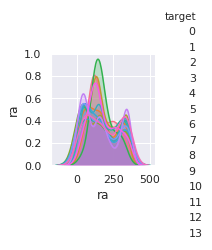

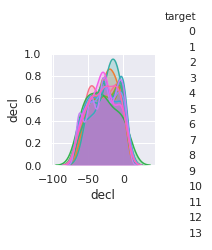

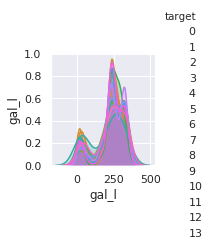

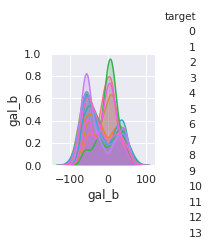

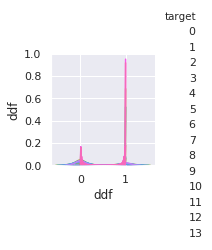

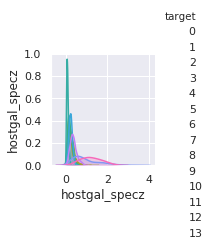

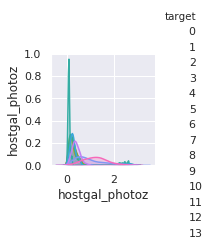

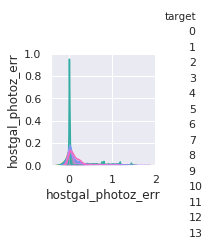

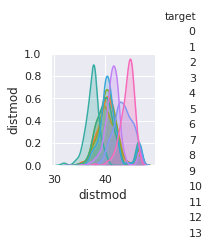

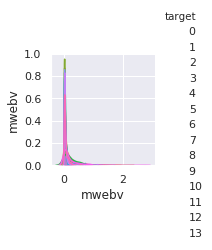

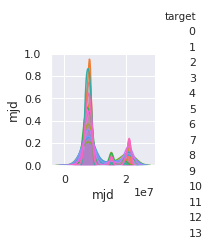

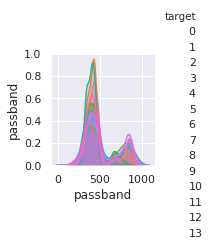

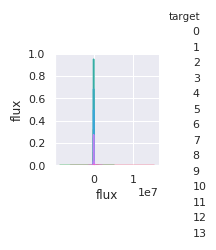

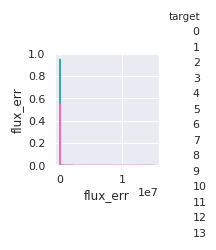

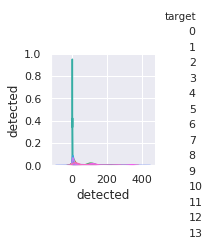

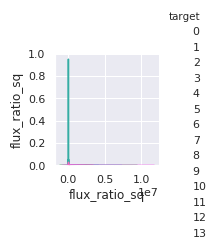

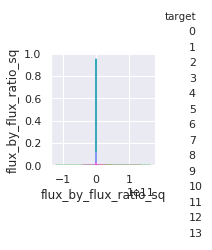

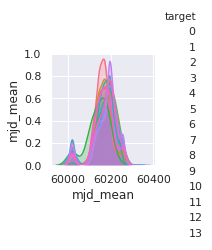

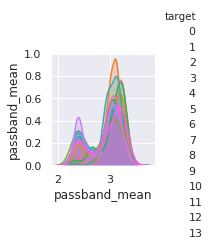

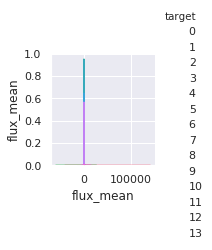

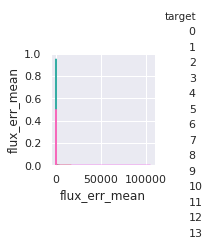

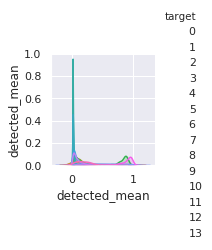

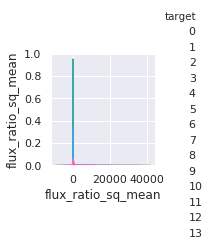

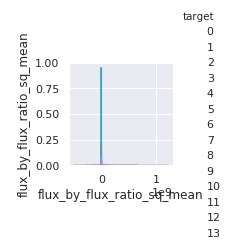

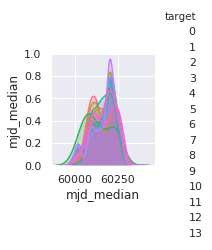

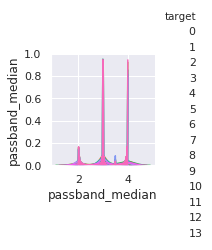

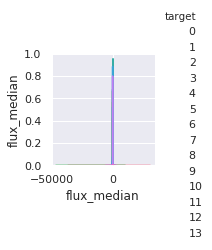

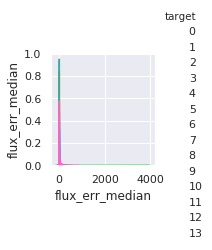

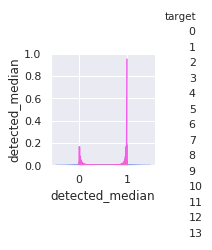

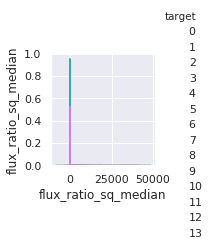

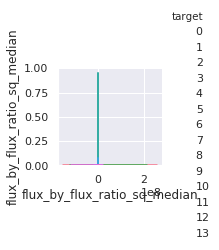

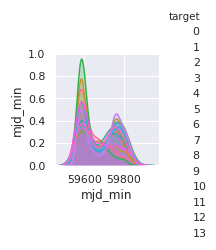

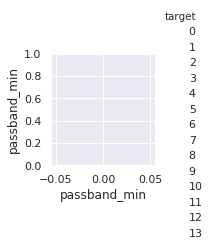

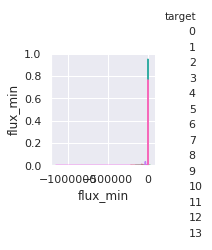

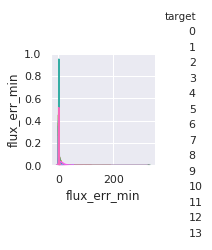

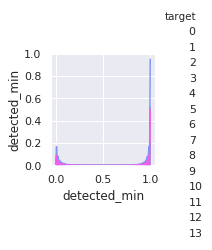

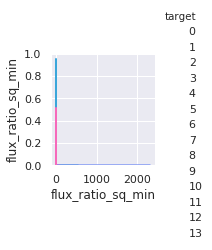

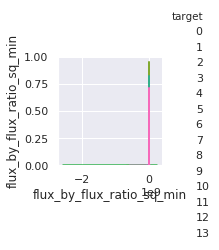

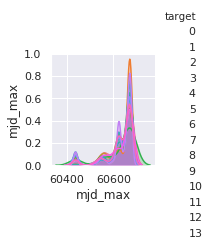

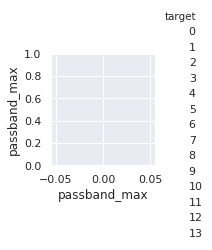

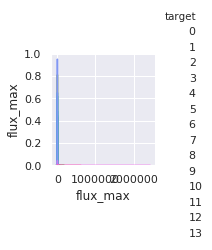

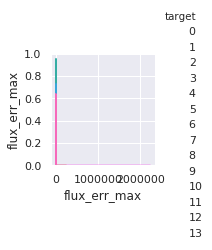

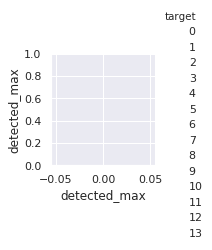

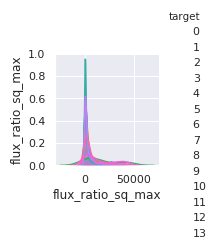

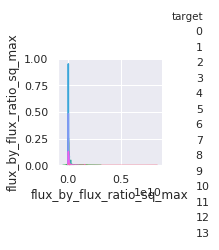

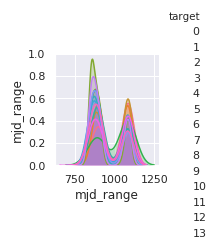

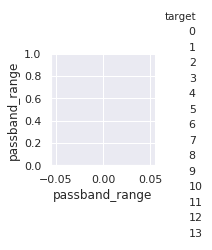

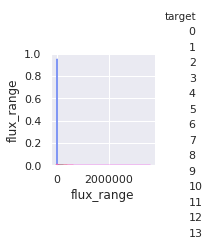

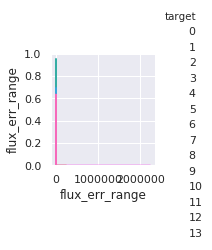

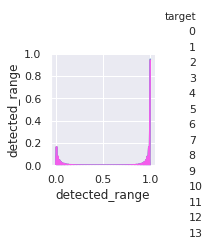

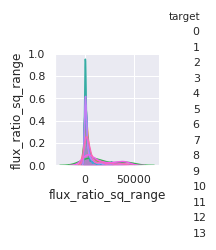

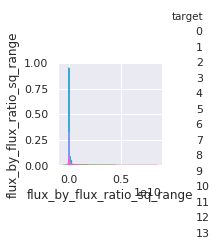

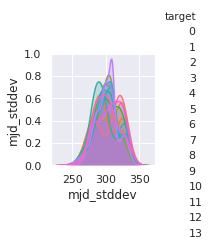

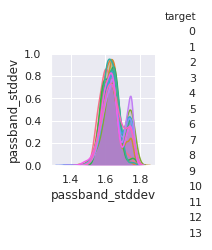

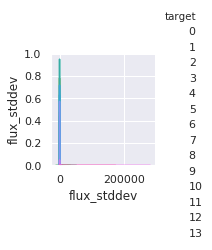

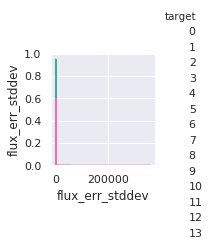

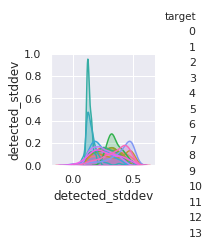

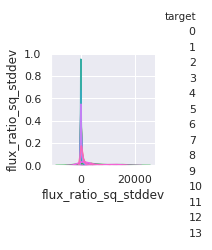

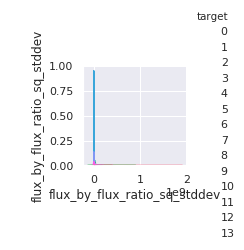

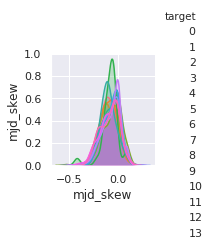

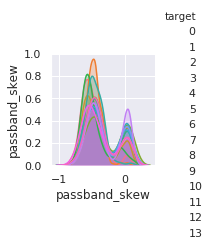

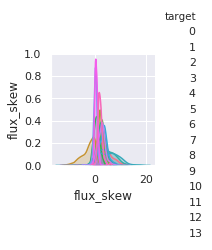

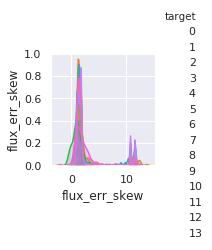

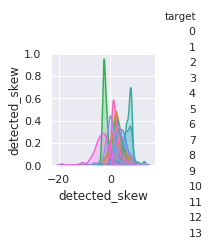

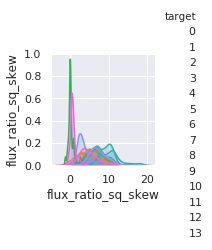

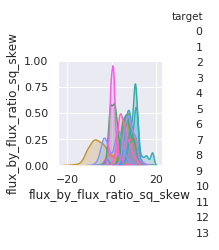

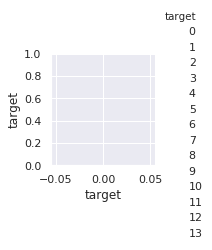

In [21]:
columns = features.columns

for column in columns[:-10]:
    sns.pairplot(x_vars=column, y_vars=column, hue='target', diag_kind='kde', data=features)

**Engineered features**

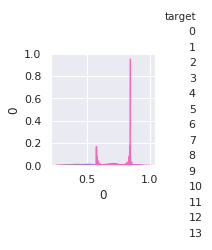

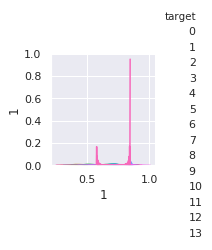

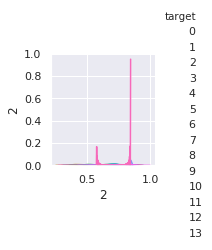

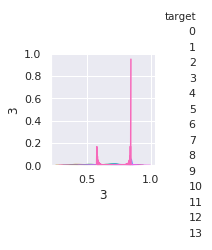

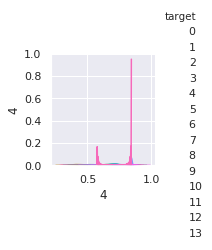

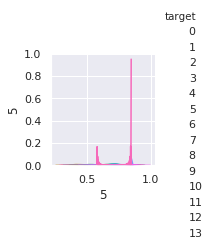

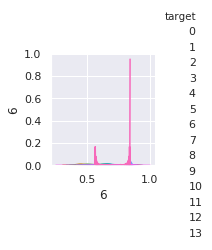

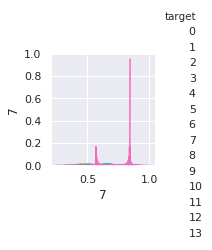

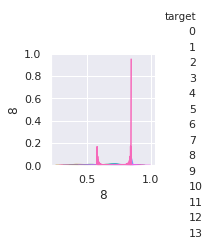

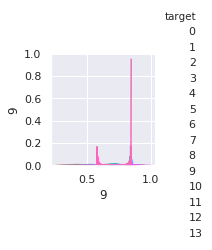

In [22]:
for column in columns[-10:]:
    sns.pairplot(x_vars=column, y_vars=column, hue='target', diag_kind='kde', data=features)

**The features for which the data distributions for different classes are very different from each other are most likely the more "important" features. This "difference" between distribution can be measured using Kullback-Leibler Divergence (a distribution similarity metric)**

In [23]:
# sns_plot = sns.pairplot(data=features, hue='target', diag_kind='kde')
# sns_plot.savefig('plasticc_visualizations.png')